# Statistiques Descriptives sur la nouvelle base `Database.csv`

Le référant nous a fourni une nouvelle base faisant correspondre les données des FQMs aux données réalisées. Il nous demande de la filtrer pour ne garder que ` Terrain = 'ORLY'`.

In [1]:
# installer geopandas
!pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /private/var/folders/gq/5vyy06nj12q4lyz8hyd86r580000gn/T/pip-req-build-teoqphuz
     |████████████████████████████████| 1.0 MB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 14.3 MB/s eta 0:00:01███████████▎     | 12.2 MB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 7.4 MB 5.9 MB/s eta 0:00:01
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.1-py3-none-any.whl (7.1 kB)
  Created wheel for geopandas: filename=geopandas-0.8.0+95.g5119410-py2.py3-none-any.whl size=980274 sha256=4b5845a7db7e39518ab17cd50aba7f2ad0bbd2e7ca4ad17d3fe29a3a14b3a27b
  Stored in directory: /private/var/folders/gq/5vyy06nj12q4lyz8hyd86r580000gn/T/pip-ephem-wheel-cache-ltts7sm6/wheels/37/ce/df/09721a3e578b57e217d038d0555fd872eba4e1fd9c8f6c8013
Successfully built geopandas


In [40]:
# installer folium
! conda install folium -c conda-forge --yes

Solving environment: done

## Package Plan ##

  environment location: /Users/h2jw/opt/anaconda3

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    conda-4.9.2                |   py38h50d1736_0         3.1 MB  conda-forge
    folium-0.12.0              |     pyhd8ed1ab_0          64 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  branca             conda-forge/noarch::branca-0.4.2-pyhd8ed1ab_0
  folium             conda-forge/noarch::folium-0.12.0-pyhd8ed1ab_0
  python_abi         conda-forge/osx-64::python_abi-3.8-1_cp38

The following packages will b

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium 

In [26]:
# Chargement des fichiers en local (Claire)
%cd --
%ls
%cd /Users/h2jw/Documents/GitHub/StatApp_2020/Data/

/Users/h2jw/Documents/GitHub/StatApp_2020/Data
FQMs/                     cities.geojson            database_sieges.csv
Histos/                   database_2016.csv         database_sieges.zip
ajout_sieges_database.py  database_2016.zip
/Users/h2jw/Documents/GitHub/StatApp_2020/Data


In [4]:
# Ouverture du zip
import zipfile 
with zipfile.ZipFile("database_2016.zip","r") as zip_ref:
    zip_ref.extractall()

with zipfile.ZipFile("database_sieges.zip","r") as zip_ref:
    zip_ref.extractall()


In [5]:
# Chargement à partir du lien Git raw
database = pd.read_csv('https://raw.githubusercontent.com/erialc-cal/StatApp_2020/main/Data/database_2016.csv', low_memory=False, decimal=',')

In [6]:
database = pd.read_csv("database_2016.csv",low_memory=False,decimal=',')
df_sieges = pd.read_csv("database_sieges.csv",low_memory=False,decimal=',')

In [7]:
database.tail(5)
database.drop(columns='Unnamed: 0')

Date       Faisceau               Pays  \
0       2016-08-31       Schengen           PORTUGAL   
1       2016-08-31       National             FRANCE   
2       2016-08-31       Schengen            ESPAGNE   
3       2016-08-31       National             FRANCE   
4       2016-08-31       Schengen           PORTUGAL   
...            ...            ...                ...   
237615  2016-12-30  International            ALGERIE   
237616  2016-12-31        Dom Tom  FRANCE GUADELOUPE   
237617  2016-12-30       National             FRANCE   
237618  2016-12-31  International              MAROC   
237619  2016-12-30       National             FRANCE   

                           Ville Terrain Terminal Aerog  \
0                          Porto    ORLY     ORYS  ORYS   
1                      Marseille    ORLY     ORYW  ORYO   
2                       Minorque    ORLY     ORYW  ORYO   
3               Toulouse Blagnac    ORLY     ORYW  ORYO   
4                Lisbonne Lisboa    ORLY     ORYW  ORYO   
...                          ...     ...      ...   ...   
237615        Annaba Les Salines    ORLY     ORYS  ORYS   
237616  Pointe à Pitre Le Raizet    ORLY     ORYW  ORYO   
237617                  Biarritz    ORLY     ORYW  ORYO   
237618                Rabat Sale    ORLY     ORYS  ORYS   
237619          Toulouse Blagnac    ORLY     ORYW  ORYO   

                           Aerop Code Aerop                  Cie  ...  \
0                          Porto       LPPR        TRANSAVIA.COM  ...   
1                      Marseille       LFML           AIR FRANCE  ...   
2                       Minorque       LEMH  VUELING AIRLINES SA  ...   
3               Toulouse Blagnac       LFBO           AIR FRANCE  ...   
4                Lisbonne Lisboa       LPPT         TAP PORTUGAL  ...   
...                          ...        ...                  ...  ...   
237615        Annaba Les Salines       DABB          AIR ALGERIE  ...   
237616  Pointe à Pitre Le Raizet       TFFR           AIR FRANCE  ...   
237617                  Biarritz       LFBZ           AIR FRANCE  ...   
237618                Rabat Sale       GMME      ROYAL AIR MAROC  ...   
237619          Toulouse Blagnac       LFBO           AIR FRANCE  ...   

         ArrDep   NumVol TypAv MVT  PAX  Date Equiv MVT_FQM PAX_FQM  \
0        Départ  TVF3470   73H   1  140  2015-08-26     1.0  103.95   
1       Arrivée  AFR6037   320   1  122  2015-09-02     1.0   133.5   
2        Départ  VLG8190   320   1   66  2015-09-02     1.0    99.0   
3        Départ  AFR6136   320   1  175  2015-09-02     1.0  108.58   
4       Arrivée   TAP442   320   1  145  2015-09-02     1.0  150.66   
...         ...      ...   ...  ..  ...         ...     ...     ...   
237615   Départ  DAH1115   73H   1  113  2011-12-30     1.0  102.06   
237616   Départ   AFR792   77W   1  389  2015-12-31     1.0   283.2   
237617  Arrivée  AFR7487   319   1  145  2015-01-02     1.0   142.4   
237618   Départ   RAM783   73H   1  101  2011-12-31     1.0   100.1   
237619  Arrivée  AFR6131   321   1   75  2015-01-02     1.0   142.4   

       Coeff_Rempl_FQM Sièges Corrections_ICI  
0                 0.55      188.5634623992838  
1                 0.75      177.6545501236368  
2                 0.55      177.6545501236368  
3                 0.61      177.6545501236368  
4                 0.93      177.6545501236368  
...                ...                    ...  
237615            0.63      188.5634623992838  
237616             0.6                  472.0  
237617             0.8     139.56106690100734  
237618            0.55      188.5634623992838  
237619             0.8     203.63568281938325  

[237620 rows x 21 columns]

In [8]:
database.columns

Index(['Unnamed: 0', 'Date', 'Faisceau', 'Pays', 'Ville', 'Terrain',
       'Terminal', 'Aerog', 'Aerop', 'Code Aerop', 'Cie', 'Code Cie', 'ArrDep',
       'NumVol', 'TypAv', 'MVT', 'PAX', 'Date Equiv', 'MVT_FQM', 'PAX_FQM',
       'Coeff_Rempl_FQM', 'Sièges Corrections_ICI'],
      dtype='object')

In [9]:
database = database.astype({'Date': 'datetime64[ns]'})

On filtre sur les vols ORLY.

In [10]:
database_orly = database[database['Terrain'].isin(['ORLY'])]

Complétude des bases. 

Valeurs manquantes ORLY: 3.658839108848974e-05 %
Valeurs manquantes totales: 3.658839108848974e-05 %


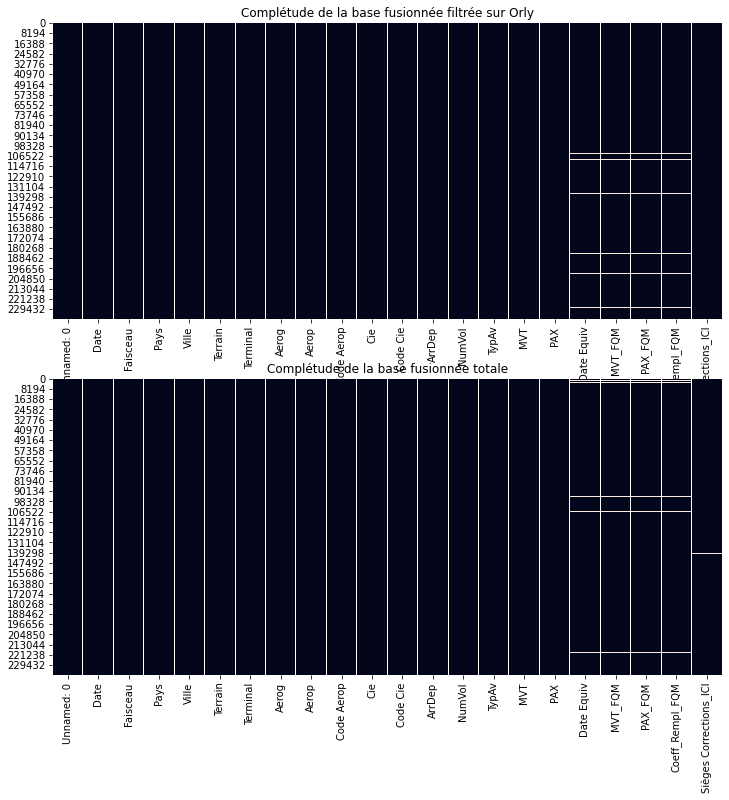

In [11]:
fig, ax = plt.subplots(2,1,figsize=(12,12))
sns.heatmap(database_orly.isnull(), cbar=False, ax=ax[0])
ax[0].set_title('Complétude de la base fusionnée filtrée sur Orly')
print('Valeurs manquantes ORLY:', database_orly.isnull().sum().sum()/(len(database_orly)*len(database_orly['Date']))*100, '%')

sns.heatmap(database.isnull(), cbar=False, ax=ax[1])
ax[1].set_title('Complétude de la base fusionnée totale')
print('Valeurs manquantes totales:', database.isnull().sum().sum()/(len(database)*len(database['Date']))*100, '%')


## Problèmes de la base : 
- Manque sièges estimés par les FQMs --> essayer d'utiliser les bases de référence 
- Quelle est la signification de `MVT_FQM` et `MVT` ? les seules modalités sont 1 (et NaN pour `MVT_FQM`) :

In [12]:
database_orly[['MVT_FQM']].drop_duplicates()

MVT_FQM
0      1.0
78     NaN

In [13]:
database_orly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237620 entries, 0 to 237619
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Unnamed: 0              237620 non-null  int64         
 1   Date                    237620 non-null  datetime64[ns]
 2   Faisceau                237619 non-null  object        
 3   Pays                    237620 non-null  object        
 4   Ville                   237620 non-null  object        
 5   Terrain                 237620 non-null  object        
 6   Terminal                237620 non-null  object        
 7   Aerog                   237620 non-null  object        
 8   Aerop                   237620 non-null  object        
 9   Code Aerop              237620 non-null  object        
 10  Cie                     237620 non-null  object        
 11  Code Cie                237620 non-null  object        
 12  ArrDep                  237620

In [14]:
database_orly = database_orly.astype({'Date Equiv': 'datetime64[ns]', 'PAX':'float','PAX_FQM':'float', 'Coeff_Rempl_FQM':'float', 'Sièges Corrections_ICI':'float'})

On crée une colonne remplissage réel. 

In [15]:
database_orly['Rempl_reel']=database_orly['PAX'].div(database_orly['Sièges Corrections_ICI'])

Text(0.5, 1.0, 'Evolution au jour des passagers estimés (FQM) et réels')

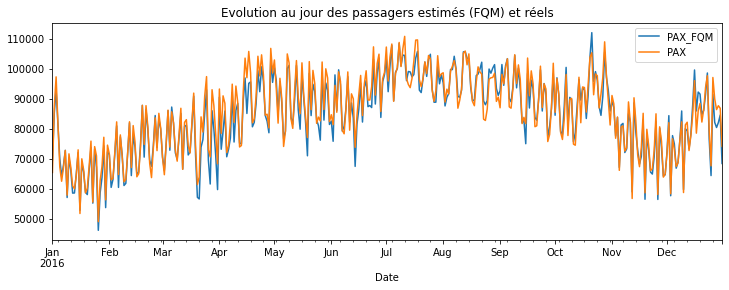

In [16]:
database_orly.groupby('Date').agg('sum')[['PAX_FQM','PAX']].plot(figsize=(12,4))
plt.title('Evolution au jour des passagers estimés (FQM) et réels')

Text(0.5, 1.0, 'Evolution au jour du taux de remplissage moyen réel et estimé (FQM)')

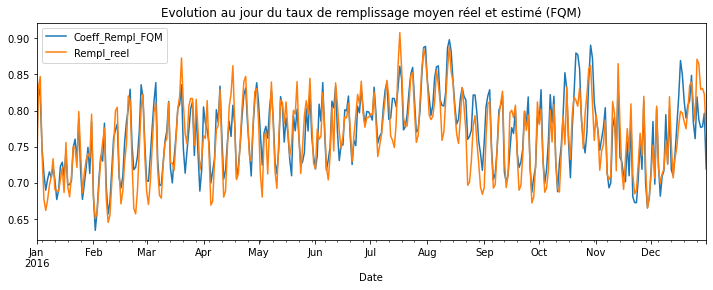

In [17]:
database_orly.groupby('Date').agg('mean')[['Coeff_Rempl_FQM','Rempl_reel']].plot(figsize=(12,4))
plt.title('Evolution au jour du taux de remplissage moyen réel et estimé (FQM)')

In [67]:
database

Unnamed: 0       Date       Faisceau               Pays  \
0          1840426 2016-08-31       Schengen           PORTUGAL   
1          1840427 2016-08-31       National             FRANCE   
2          1840428 2016-08-31       Schengen            ESPAGNE   
3          1840429 2016-08-31       National             FRANCE   
4          1840430 2016-08-31       Schengen           PORTUGAL   
...            ...        ...            ...                ...   
237615     2078041 2016-12-30  International            ALGERIE   
237616     2078042 2016-12-31        Dom Tom  FRANCE GUADELOUPE   
237617     2078043 2016-12-30       National             FRANCE   
237618     2078044 2016-12-31  International              MAROC   
237619     2078045 2016-12-30       National             FRANCE   

                           Ville Terrain Terminal Aerog  \
0                          Porto    ORLY     ORYS  ORYS   
1                      Marseille    ORLY     ORYW  ORYO   
2                       Minorque    ORLY     ORYW  ORYO   
3               Toulouse Blagnac    ORLY     ORYW  ORYO   
4                Lisbonne Lisboa    ORLY     ORYW  ORYO   
...                          ...     ...      ...   ...   
237615        Annaba Les Salines    ORLY     ORYS  ORYS   
237616  Pointe à Pitre Le Raizet    ORLY     ORYW  ORYO   
237617                  Biarritz    ORLY     ORYW  ORYO   
237618                Rabat Sale    ORLY     ORYS  ORYS   
237619          Toulouse Blagnac    ORLY     ORYW  ORYO   

                           Aerop Code Aerop  ...   ArrDep   NumVol TypAv MVT  \
0                          Porto       LPPR  ...   Départ  TVF3470   73H   1   
1                      Marseille       LFML  ...  Arrivée  AFR6037   320   1   
2                       Minorque       LEMH  ...   Départ  VLG8190   320   1   
3               Toulouse Blagnac       LFBO  ...   Départ  AFR6136   320   1   
4                Lisbonne Lisboa       LPPT  ...  Arrivée   TAP442   320   1   
...                          ...        ...  ...      ...      ...   ...  ..   
237615        Annaba Les Salines       DABB  ...   Départ  DAH1115   73H   1   
237616  Pointe à Pitre Le Raizet       TFFR  ...   Départ   AFR792   77W   1   
237617                  Biarritz       LFBZ  ...  Arrivée  AFR7487   319   1   
237618                Rabat Sale       GMME  ...   Départ   RAM783   73H   1   
237619          Toulouse Blagnac       LFBO  ...  Arrivée  AFR6131   321   1   

        PAX  Date Equiv  MVT_FQM PAX_FQM Coeff_Rempl_FQM  \
0       140  2015-08-26      1.0  103.95            0.55   
1       122  2015-09-02      1.0   133.5            0.75   
2        66  2015-09-02      1.0    99.0            0.55   
3       175  2015-09-02      1.0  108.58            0.61   
4       145  2015-09-02      1.0  150.66            0.93   
...     ...         ...      ...     ...             ...   
237615  113  2011-12-30      1.0  102.06            0.63   
237616  389  2015-12-31      1.0   283.2             0.6   
237617  145  2015-01-02      1.0   142.4             0.8   
237618  101  2011-12-31      1.0   100.1            0.55   
237619   75  2015-01-02      1.0   142.4             0.8   

       Sièges Corrections_ICI  
0           188.5634623992838  
1           177.6545501236368  
2           177.6545501236368  
3           177.6545501236368  
4           177.6545501236368  
...                       ...  
237615      188.5634623992838  
237616                  472.0  
237617     139.56106690100734  
237618      188.5634623992838  
237619     203.63568281938325  

[237620 rows x 22 columns]

In [65]:
database.Pays.value_counts().sort_values(ascending=False)

FRANCE                 105209
ESPAGNE                 24167
PORTUGAL                16783
ITALIE                  16773
MAROC                   14425
                        ...  
KENYA                       1
EMIRATS ARABES UNIS         1
KOWEIT                      1
SOUDAN                      1
NON IDENTIFIE               1
Name: Pays, Length: 86, dtype: int64

In [60]:
database.Ville.value_counts().sort_values(ascending=False)

Toulouse Blagnac         17480
Nice Côte d'Azur         14561
Lisbonne Lisboa           9231
Madrid Barajas            8251
Bordeaux Merignac         7699
                         ...  
Amman Queen Alia Intl        1
Doncaster Sheffield          1
Jersey States                1
Toussus-le-Noble             1
Borg El Arab Airport         1
Name: Ville, Length: 326, dtype: int64

In [71]:
world = gpd.read_file(r"https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json")
world['name'] = world.name.str.upper()
world.name

0               AFGHANISTAN
1                    ANGOLA
2                   ALBANIA
3      UNITED ARAB EMIRATES
4                 ARGENTINA
               ...         
175               WEST BANK
176                   YEMEN
177            SOUTH AFRICA
178                  ZAMBIA
179                ZIMBABWE
Name: name, Length: 180, dtype: object

In [78]:
df_map = pd.merge(world, database,left_on='name', right_on='Pays')
df_map = df_map.astype({'MVT_FQM':'float64', 'PAX_FQM':'float64', 'Coeff_Rempl_FQM':'float64', 'Sièges Corrections_ICI':'float64', 'MVT':'int64'})
df_map_pays = df_map.groupby('Pays').agg({'MVT_FQM':'sum','PAX_FQM':'sum','Coeff_Rempl_FQM':'mean', 'Sièges Corrections_ICI':'sum', 'MVT':'sum'})
df_aff = pd.merge(world, df_map_pays,left_on='name', right_on='Pays')

In [77]:
df_map_pays

MVT_FQM       PAX_FQM  Coeff_Rempl_FQM  Sièges Corrections_ICI  \
Pays                                                                          
CANADA         180.0  4.900694e+04         0.756280            6.750513e+04   
CUBA           138.0  2.927889e+04         0.778951            2.116460e+04   
FRANCE      103271.0  1.085854e+07         0.740343            1.457703e+07   
GABON            0.0  0.000000e+00              NaN            2.970185e+02   
HAITI           69.0  1.864837e+04         0.727871            2.566535e+04   
IRAN           209.0  3.989975e+04         0.731448            5.431800e+04   
ISRAEL         766.0  1.073215e+05         0.741304            1.474446e+05   
KAZAKHSTAN       0.0  0.000000e+00              NaN            0.000000e+00   
KENYA            0.0  0.000000e+00              NaN            5.318172e+02   
LUXEMBOURG       0.0  0.000000e+00              NaN            1.686762e+04   
MADAGASCAR      86.0  1.897267e+04         0.725699            2.523090e+04   
MALI           215.0  2.751866e+04         0.735596            3.530677e+04   
NIGER            0.0  0.000000e+00              NaN            0.000000e+00   
OMAN             0.0  0.000000e+00              NaN            4.163921e+02   
PORTUGAL     16481.0  2.215720e+06         0.809149            2.852573e+06   
QATAR            0.0  0.000000e+00              NaN            6.277935e+03   
SENEGAL        635.0  1.586780e+05         0.750708            1.917744e+05   
TOGO             0.0  0.000000e+00              NaN            5.559531e+02   
UKRAINE          0.0  0.000000e+00              NaN            4.163921e+02   
URUGUAY          0.0  0.000000e+00              NaN            2.768310e+02   
VIETNAM          0.0  0.000000e+00              NaN            2.768310e+02   

               MVT  
Pays                
CANADA         204  
CUBA           153  
FRANCE      105209  
GABON            2  
HAITI           71  
IRAN           210  
ISRAEL         784  
KAZAKHSTAN       2  
KENYA            1  
LUXEMBOURG      33  
MADAGASCAR      88  
MALI           218  
NIGER            4  
OMAN             2  
PORTUGAL     16783  
QATAR           24  
SENEGAL        660  
TOGO             3  
UKRAINE          2  
URUGUAY          1  
VIETNAM          1

In [27]:
cities = gpd.read_file(r'cities.geojson')

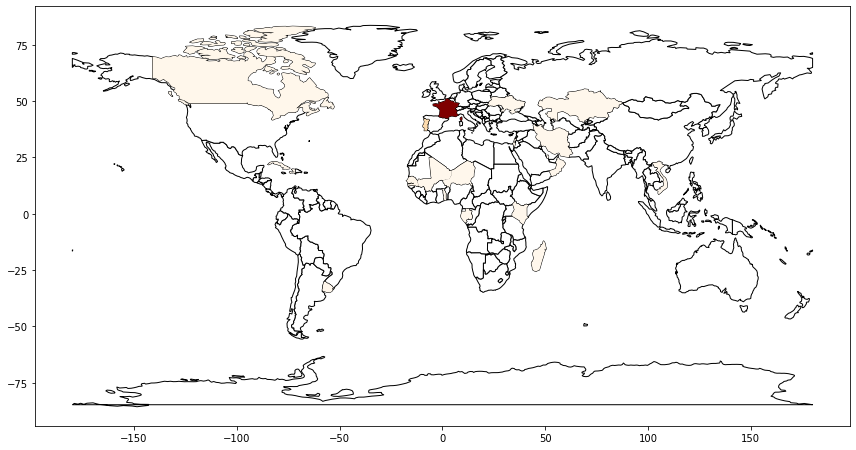

In [86]:
fig, ax = plt.subplots(figsize=(12,12))
world.plot(ax=ax, color='white', edgecolors='black')
df_aff.plot(column='PAX_FQM',ax=ax,  cmap='OrRd')
plt.tight_layout()
plt.savefig('overlay_map.png')
plt.show()


In [53]:
df_map = pd.merge(cities, database,left_on='name', right_on='Ville')
#df_map_gr = df_map.groupby('cities').agg('sum')

In [ ]:
df_map

In [47]:
# création du fond de carte
DFW_Map = folium.Map(
                location = [0,-10], 
                zoom_start = 2)


# affichage carte
DFW_Map

## Représentations graphiques du nombre de passagers journalier :

In [19]:
faisceaux = ["National","Schengen","Dom Tom","Autre UE","International"]

database_orly_depart = database_orly[database_orly['ArrDep'].isin(['Départ'])]
database_orly_arrivee = database_orly[database_orly['ArrDep'].isin(['Arrivée'])]

Text(0.5, 0.98, 'Comparaison entre nombre de passagers réalisés et estimés par jour (somme) sur chaque faisceau, en fonction du type de mouvement :')

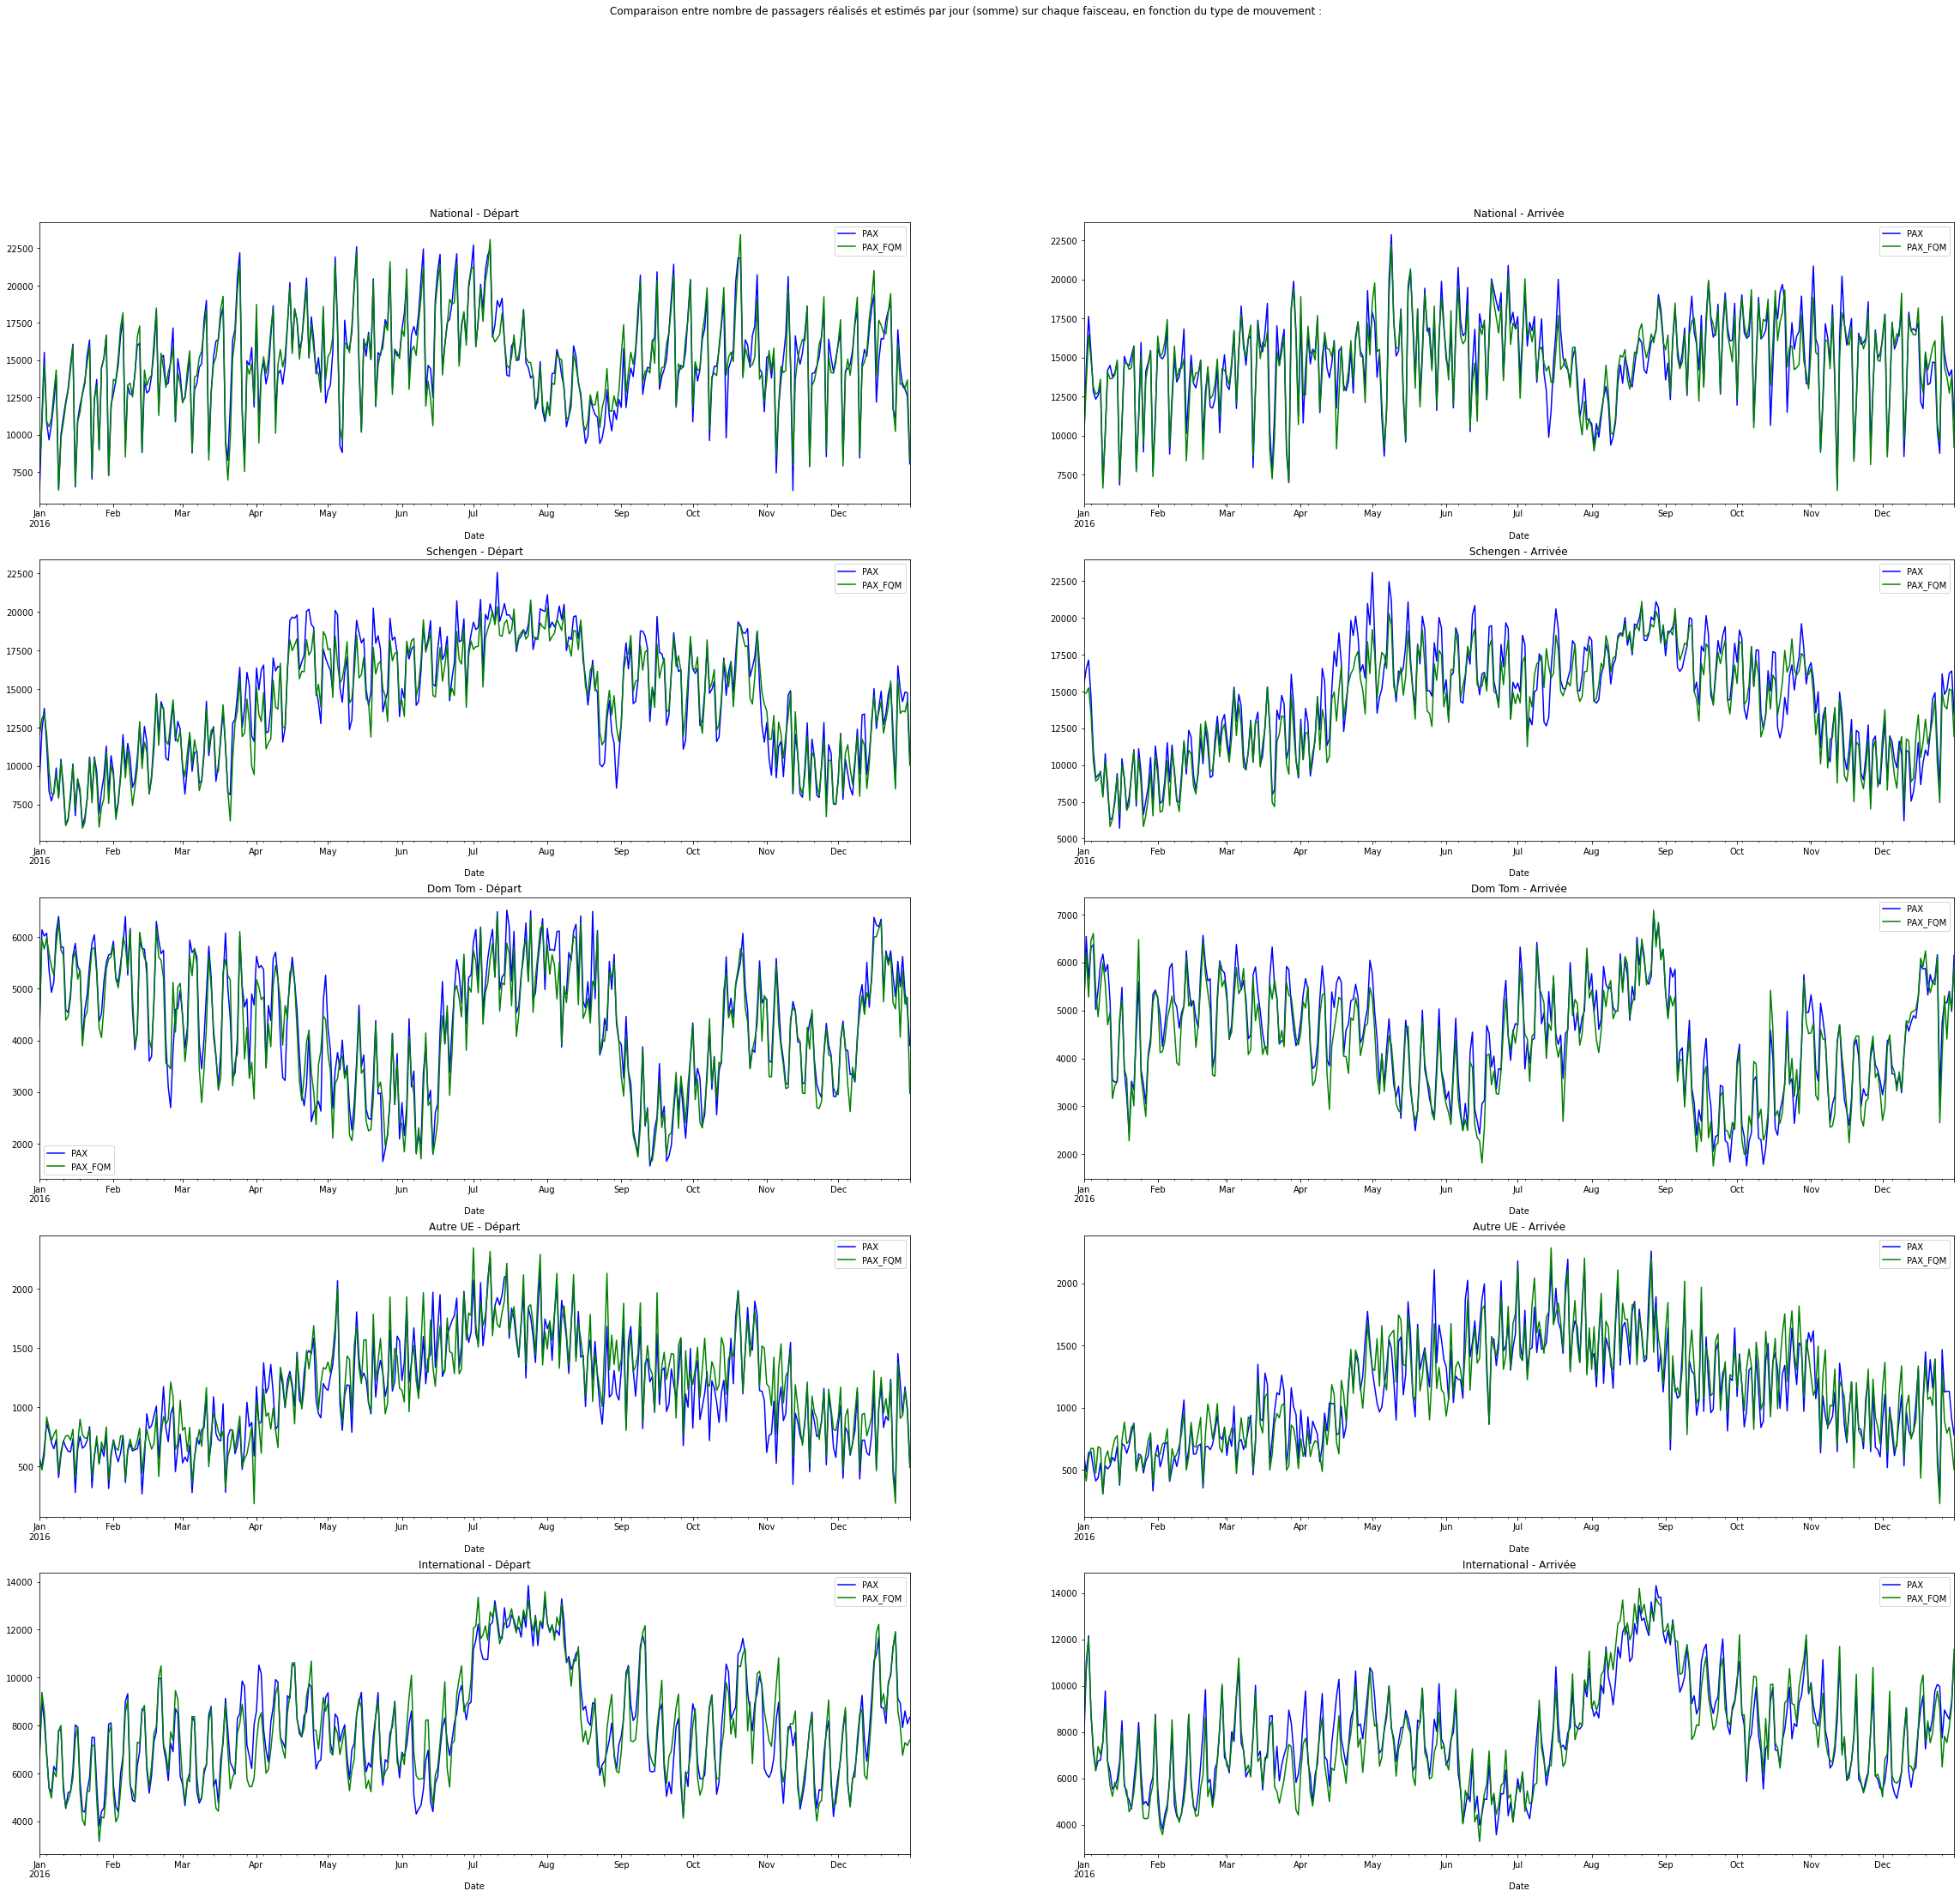

In [20]:
fig, ax = plt.subplots(5,2, figsize=(40,35))

for i in range(5) :
    ax[(i,0)].set_title(faisceaux[i]+" - Départ")
    
    database_orly_depart[database_orly_depart['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'PAX':'sum'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='blue')
    database_orly_depart[database_orly_depart['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'PAX_FQM':'sum'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='green')
    
    ax[(i,1)].set_title(faisceaux[i]+" - Arrivée")
    
    database_orly_arrivee[database_orly_arrivee['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'PAX':'sum'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='blue')
    database_orly_arrivee[database_orly_arrivee['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'PAX_FQM':'sum'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='green')
    
fig.suptitle('Comparaison entre nombre de passagers réalisés et estimés par jour (somme) sur chaque faisceau, en fonction du type de mouvement :')

Les FQMs ne sont remplis qu'entre 2016 et 2017. On ne va représenter que cette partie : 

In [21]:
database_orly2 = database_orly[database_orly['Date']>np.datetime64('2015-12-31')]

In [22]:
database_orly2.count()

Unnamed: 0                237620
Date                      237620
Faisceau                  237619
Pays                      237620
Ville                     237620
Terrain                   237620
Terminal                  237620
Aerog                     237620
Aerop                     237620
Code Aerop                237620
Cie                       237620
Code Cie                  237620
ArrDep                    237620
NumVol                    237620
TypAv                     237620
MVT                       237620
PAX                       237620
Date Equiv                232710
MVT_FQM                   232710
PAX_FQM                   232710
Coeff_Rempl_FQM           232710
Sièges Corrections_ICI    236602
Rempl_reel                236602
dtype: int64

#### Il subsiste qqs valeurs manquantes (1 faisceau et surtout 4 910 FQMs...)

In [23]:
database_orly_depart2 = database_orly2[database_orly2['ArrDep'].isin(['Départ'])]
database_orly_arrivee2 = database_orly2[database_orly2['ArrDep'].isin(['Arrivée'])]

Text(0.5, 0.98, 'Comparaison entre nombre de passagers réalisés et estimés par jour (somme) en 2016 sur chaque faisceau, en fonction du type de mouvement :')

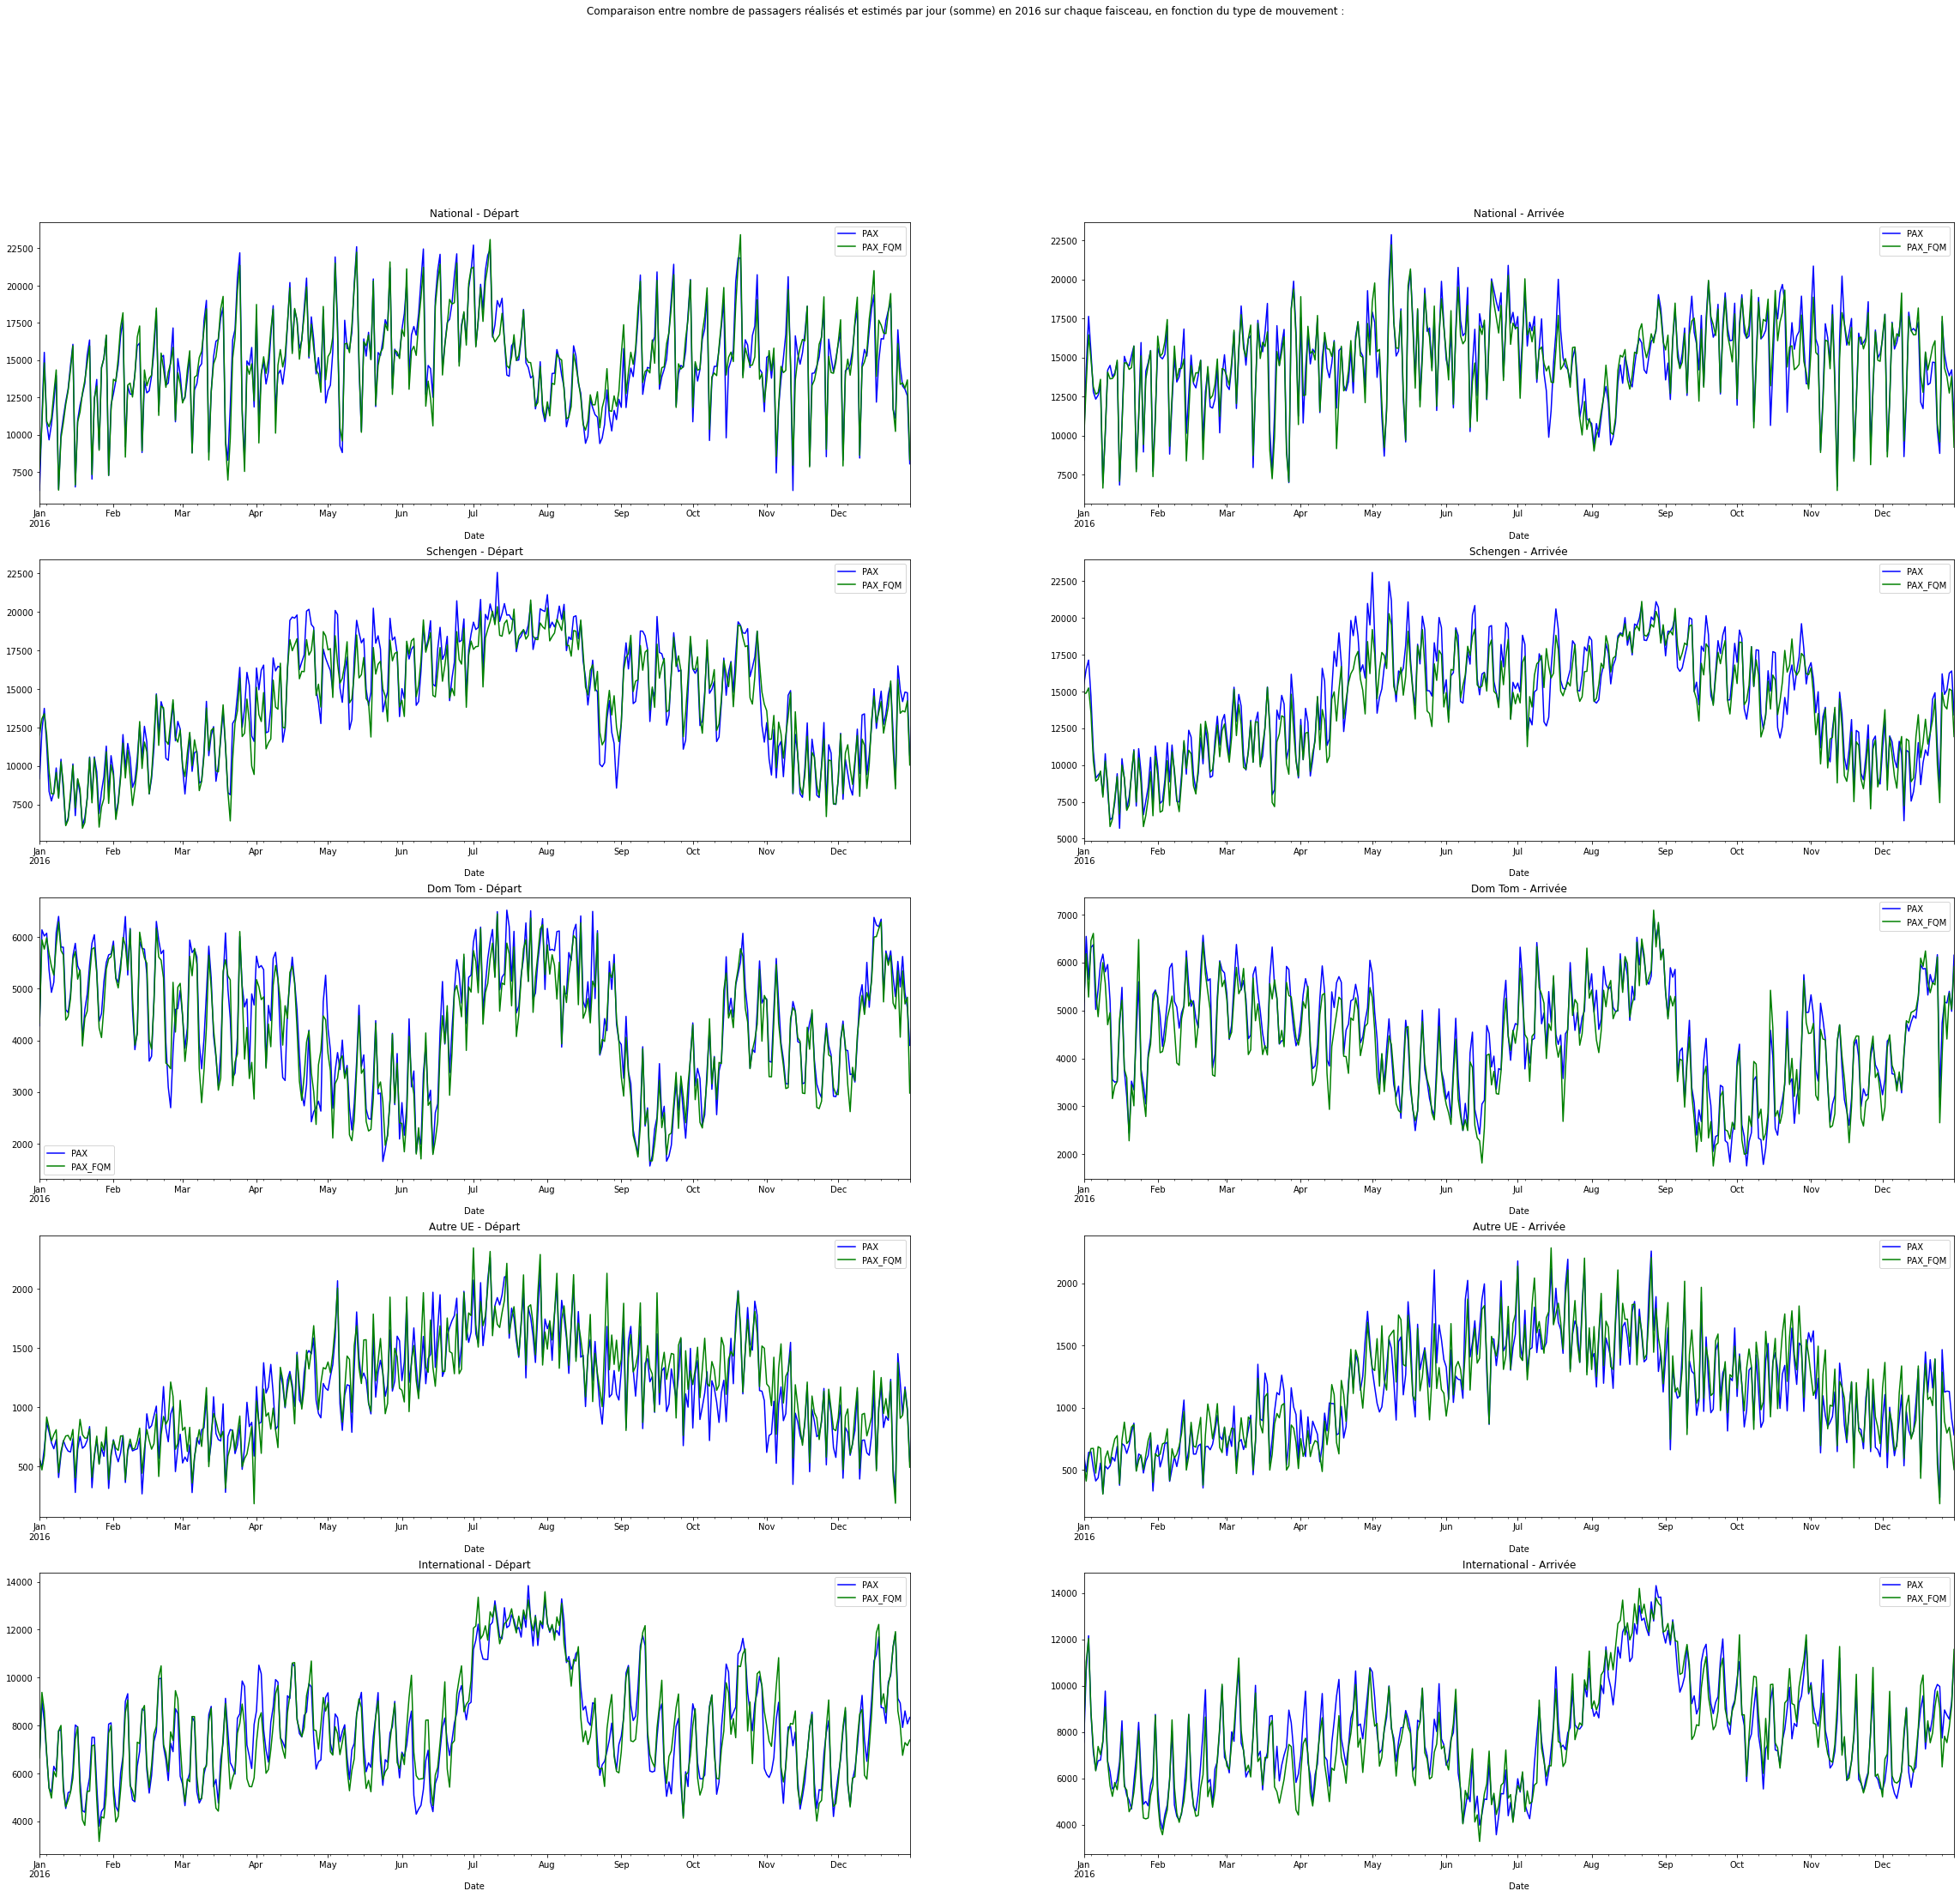

In [24]:
fig, ax = plt.subplots(5,2, figsize=(40,35))

for i in range(5) :
    ax[(i,0)].set_title(faisceaux[i]+" - Départ")
    
    database_orly_depart2[database_orly_depart2['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'PAX':'sum'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='blue')
    database_orly_depart2[database_orly_depart2['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'PAX_FQM':'sum'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='green')
    
    ax[(i,1)].set_title(faisceaux[i]+" - Arrivée")
    
    database_orly_arrivee2[database_orly_arrivee2['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'PAX':'sum'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='blue')
    database_orly_arrivee2[database_orly_arrivee2['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'PAX_FQM':'sum'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='green')
    
fig.suptitle('Comparaison entre nombre de passagers réalisés et estimés par jour (somme) en 2016 sur chaque faisceau, en fonction du type de mouvement :')

## Tentative ajout du nombre de sièges par type avion à partir de notre base de référence :

In [25]:
base_ref = pd.read_csv("base_ref_2.csv")
base_ref.drop(['Unnamed: 0'], axis='columns', inplace=True)
base_ref.rename(columns={'Tav':'TypAv'}, inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'base_ref_2.csv'

In [ ]:
base_ref.tail()

In [ ]:
database_orly3 = database_orly.merge(base_ref,how='left', on=["TypAv"])

In [ ]:
database_orly3.tail()

In [ ]:
database_orly3.count()

#### Cette fois, la base de référence nous permet de compléter la base totale de manière très satisfaisante (seulement 43 212 valeurs manquantes, ce qui représente 2,08% de la base)

In [ ]:
database_orly3['Dif. sièges - passagers'] = database_orly3['Sièges Corrections_ICI'] - database_orly3['PAX']

fig,ax = plt.subplots(1, 2, figsize=(12,6)) 

sns.histplot(data=database_orly3,x='Dif. sièges - passagers',ax=ax[0])
sns.kdeplot(data=database_orly3,x='Dif. sièges - passagers',ax=ax[1])

fig.suptitle("Répartition des différences entre nombre de sièges estimés et passagers réalisés (pour les valeurs renseignées)")

#### On a des répartitions des différences entre nombre de passager et nombre de sièges beaucoup plus cohérentes, et majoritairement positives (ce qui est rassurant car indique qu'il y a plus de sièges que de passagers)

## Représentations graphiques des LF% moyens journaliers : 

In [ ]:
database_orly3['LF% réalisé'] = database_orly3['PAX']/database_orly3['Sièges Corrections_ICI']

In [ ]:
database_orly3.tail()

Unnamed: 0       Date       Faisceau               Pays  \
2078041     6576297 2016-12-30  International            ALGERIE   
2078042     6576299 2016-12-31        Dom Tom  FRANCE GUADELOUPE   
2078043     6576300 2016-12-30       National             FRANCE   
2078044     6576303 2016-12-31  International              MAROC   
2078045     6576305 2016-12-30       National             FRANCE   

                            Ville Terrain Terminal Aerog  \
2078041        Annaba Les Salines    ORLY     ORYS  ORYS   
2078042  Pointe à Pitre Le Raizet    ORLY     ORYW  ORYO   
2078043                  Biarritz    ORLY     ORYW  ORYO   
2078044                Rabat Sale    ORLY     ORYS  ORYS   
2078045          Toulouse Blagnac    ORLY     ORYW  ORYO   

                            Aerop Code Aerop  ... TypAv MVT  PAX  Date Equiv  \
2078041        Annaba Les Salines       DABB  ...   73H   1  113  2011-12-30   
2078042  Pointe à Pitre Le Raizet       TFFR  ...   77W   1  389  2015-12-31   
2078043                  Biarritz       LFBZ  ...   319   1  145  2015-01-02   
2078044                Rabat Sale       GMME  ...   73H   1  101  2011-12-31   
2078045          Toulouse Blagnac       LFBO  ...   321   1   75  2015-01-02   

        MVT_FQM  PAX_FQM  Coeff_Rempl_FQM Sièges Corrections_ICI  \
2078041     1.0   102.06             0.63             188.563462   
2078042     1.0   283.20             0.60             472.000000   
2078043     1.0   142.40             0.80             139.561067   
2078044     1.0   100.10             0.55             188.563462   
2078045     1.0   142.40             0.80             203.635683   

         Dif. sièges - passagers  LF% réalisé  
2078041                75.563462     0.599268  
2078042                83.000000     0.824153  
2078043                -5.438933     1.038972  
2078044                87.563462     0.535629  
2078045               128.635683     0.368305  

[5 rows x 24 columns]

In [ ]:
database_orly_depart3 = database_orly3[database_orly3['ArrDep'].isin(['Départ'])]
database_orly_arrivee3 = database_orly3[database_orly3['ArrDep'].isin(['Arrivée'])]

Text(0.5, 0.98, 'Comparaison entre taux de remplissages réalisés et estimés par jour (somme) sur chaque faisceau, en fonction du type de mouvement :')

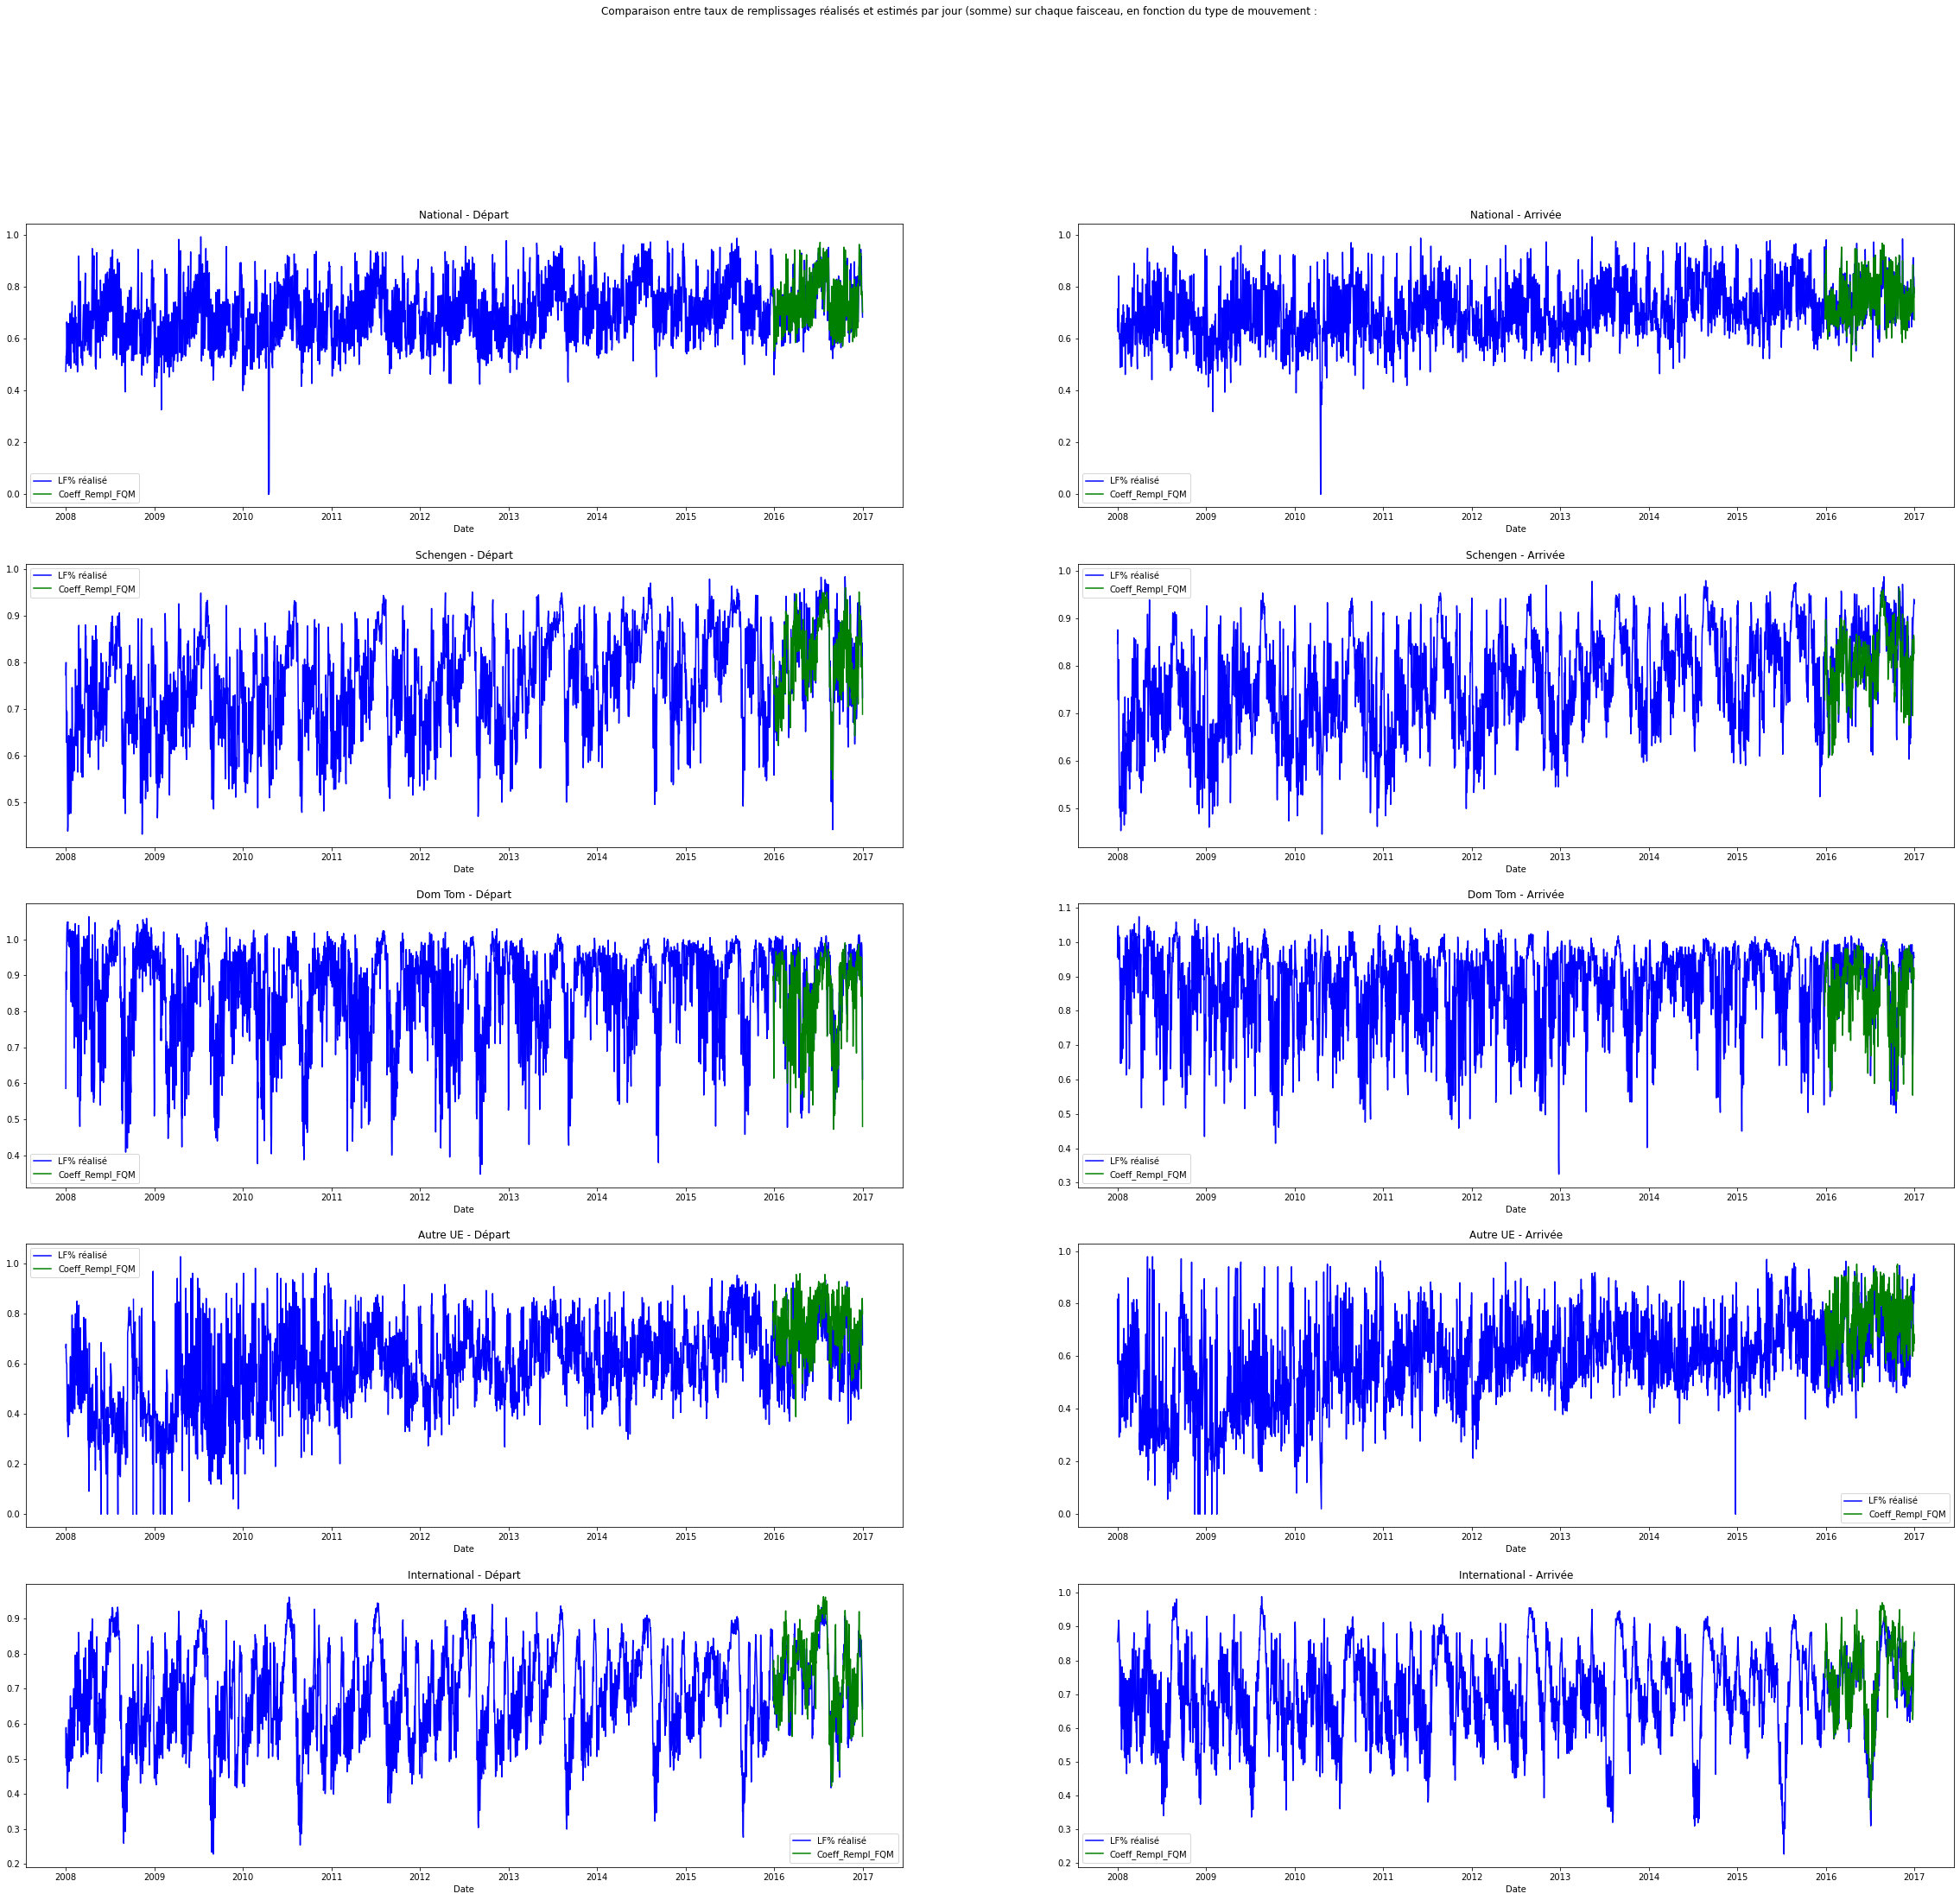

In [ ]:
fig, ax = plt.subplots(5,2, figsize=(40,35))

for i in range(5) :
    ax[(i,0)].set_title(faisceaux[i]+" - Départ")
    
    database_orly_depart3[database_orly_depart3['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'LF% réalisé':'mean'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='blue')
    database_orly_depart3[database_orly_depart3['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'Coeff_Rempl_FQM':'mean'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='green')
    
    ax[(i,1)].set_title(faisceaux[i]+" - Arrivée")
    
    database_orly_arrivee3[database_orly_arrivee3['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'LF% réalisé':'mean'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='blue')
    database_orly_arrivee3[database_orly_arrivee3['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'Coeff_Rempl_FQM':'mean'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='green')
    
fig.suptitle('Comparaison entre taux de remplissages réalisés et estimés par jour (somme) sur chaque faisceau, en fonction du type de mouvement :')

In [ ]:
database_orly4 = database_orly3[database_orly3['Date']>np.datetime64('2015-12-31')]

In [ ]:
database_orly_depart4 = database_orly4[database_orly3['ArrDep'].isin(['Départ'])]
database_orly_arrivee4 = database_orly4[database_orly3['ArrDep'].isin(['Arrivée'])]

<ipython-input-26-c431ccaed9bc>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  database_orly_depart4 = database_orly4[database_orly3['ArrDep'].isin(['Départ'])]
<ipython-input-26-c431ccaed9bc>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  database_orly_arrivee4 = database_orly4[database_orly3['ArrDep'].isin(['Arrivée'])]


Text(0.5, 0.98, 'Comparaison entre taux de remplissages réalisés et estimés par jour (somme) en 2016 sur chaque faisceau, en fonction du type de mouvement :')

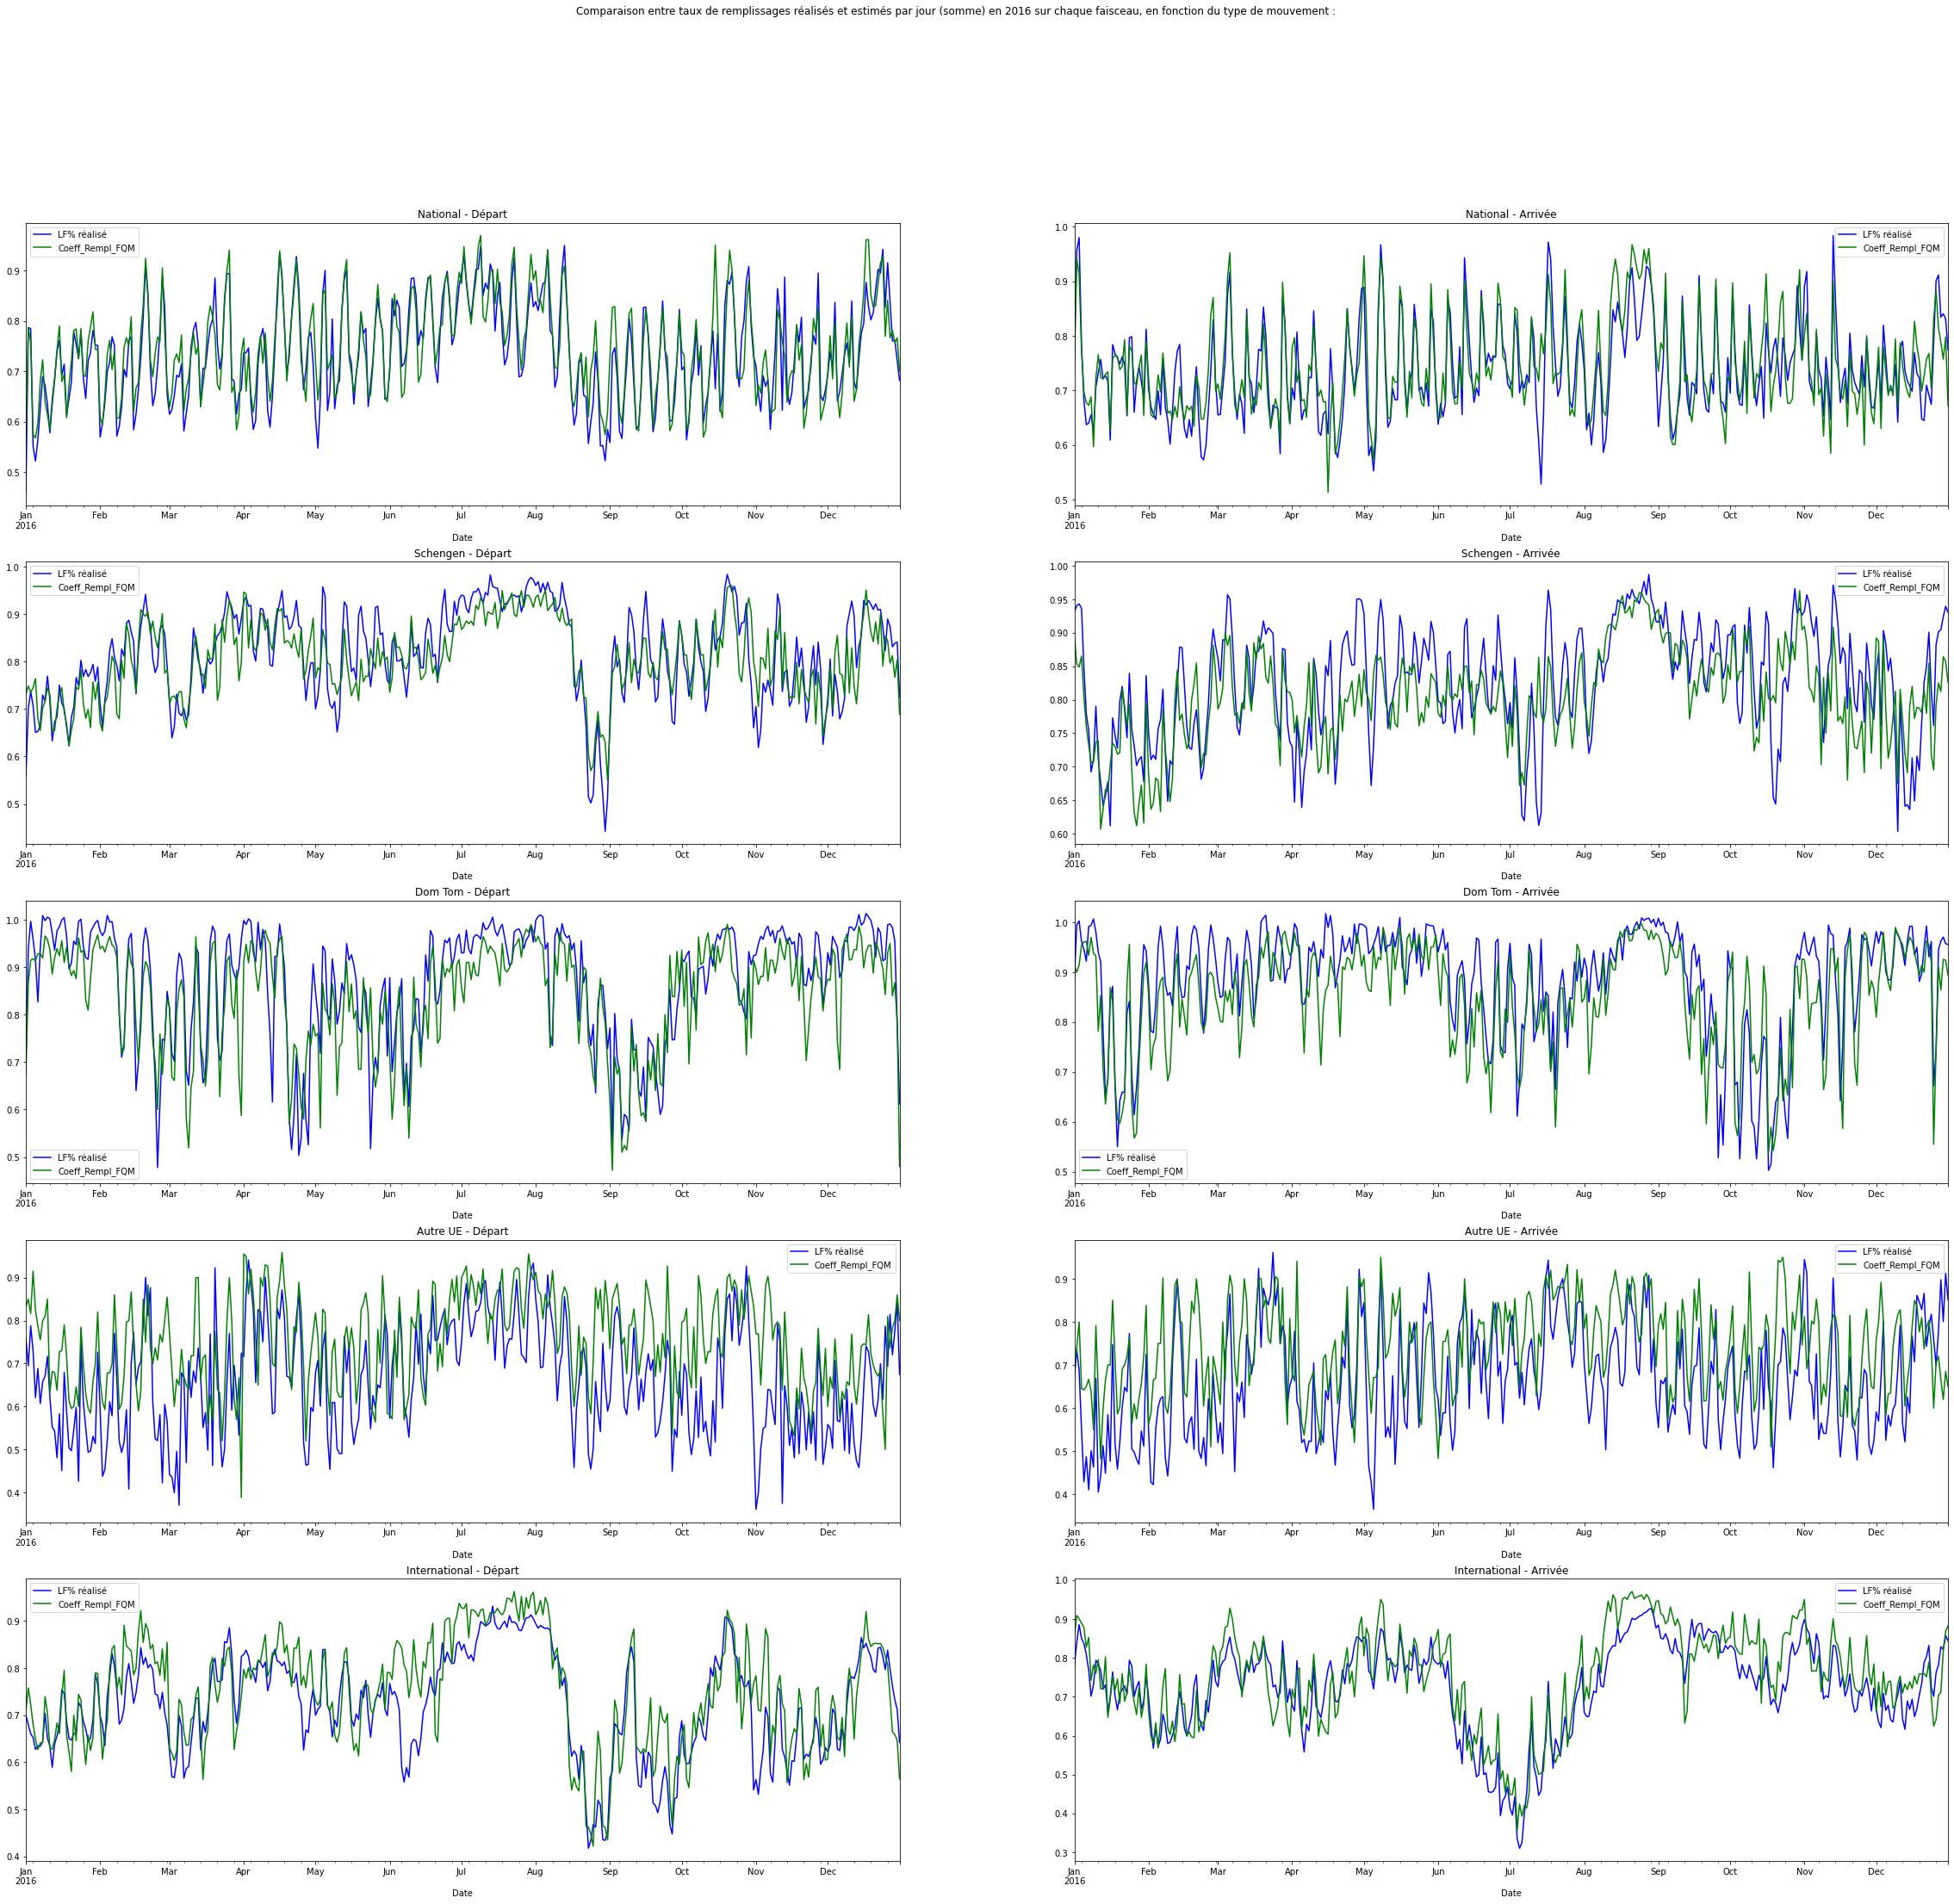

In [ ]:
fig, ax = plt.subplots(5,2, figsize=(40,35))

for i in range(5) :
    ax[(i,0)].set_title(faisceaux[i]+" - Départ")
    
    database_orly_depart4[database_orly_depart4['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'LF% réalisé':'mean'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='blue')
    database_orly_depart4[database_orly_depart4['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'Coeff_Rempl_FQM':'mean'}).plot(ax = ax[(i,0)],legend=True, subplots=True,color='green')
    
    ax[(i,1)].set_title(faisceaux[i]+" - Arrivée")
    
    database_orly_arrivee4[database_orly_arrivee4['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'LF% réalisé':'mean'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='blue')
    database_orly_arrivee4[database_orly_arrivee4['Faisceau'].isin([faisceaux[i]])].groupby('Date').agg({'Coeff_Rempl_FQM':'mean'}).plot(ax = ax[(i,1)],legend=True, subplots=True,color='green')
    
fig.suptitle('Comparaison entre taux de remplissages réalisés et estimés par jour (somme) en 2016 sur chaque faisceau, en fonction du type de mouvement :')